In [114]:
import pandas as pd 
import numpy as np 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, silhouette_score 

from sklearn.decomposition import PCA 

In [3]:
df = sb.load_dataset("iris") 
Ydf = df["species"] 
Xdf = df.drop(["species"],axis=1)
Xdf

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
ss = StandardScaler() 
Xdf = pd.DataFrame(ss.fit_transform(Xdf) , columns=Xdf.columns)
df = Xdf.copy() 
df["species"]=Ydf 

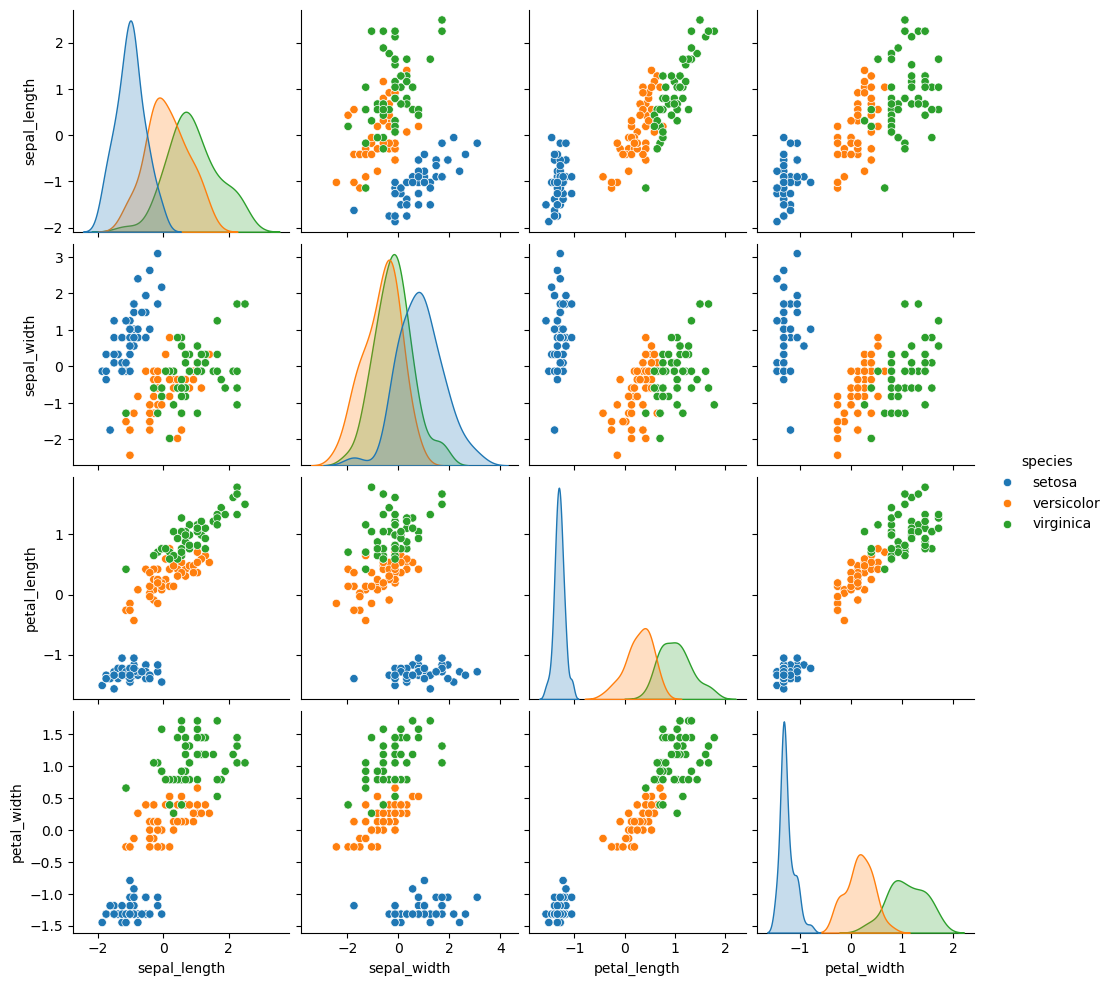

In [4]:
sb.pairplot(data=df, hue="species")

In [104]:
class dbscan: 
    def __init__(self,eps=0.5,minPts=5): 
        self.eps = eps 
        self.minPts = minPts 
        
    def distance(self,x,y,d): 
        result = 0 
        for i in range(d): 
            result+=((x[i]-y[i])**2)
        return result 
    
    def fit_transform(self,df):
        X = df.values 
        d = X.shape[1]
        n = X.shape[0] 
        clusters = {} 
        clusterNo = 0 
        visited = np.zeros(n) 
        coreCount = 0
        while(True): 
            core = -1 
            for i in range(n):
                if(visited[i]!=0): continue
                pts = 0
                for j in range(n):
                    # print(self.distance(X[j],X[i],d))
                    if(visited[j]!=1 and self.distance(X[j],X[i],d)<=self.eps): pts+=1
                if(pts<self.minPts):
                    visited[i]=-1 
                    continue 
                core=i 
                visited[i]=1 
                break 
            if(core==-1): break 
            clusters[coreCount]=[] 
            q = [core]
            # print(q)
            while(len(q)!=0): 
                # print(q,"***************************")
                top=q[-1] 
                clusters[coreCount].append(top) 
                q.pop() 
                visited[top]=1
                for i in range(n): 
                    if(visited[i]==1): continue 
                    if(self.distance(X[top],X[i],d)<=self.eps): 
                        q.append(i)
                        visited[i]=1
            coreCount+=1
            clusters[-1]=[]
            for i in range(n): 
                if(visited[i]==-1): 
                    clusters[-1].append(i)
        return clusters 
            
            
                    
                        

dbs = dbscan() 
# print(dbs.fit_transform(Xdf))

In [105]:

dbs = dbscan() 
print("")
clusters = dbs.fit_transform(Xdf) 
# print(clusters)

rows = [] 

for k in clusters.keys(): 
    for c in clusters[k]: 
        c=list(Xdf.iloc[c,:]) 
        c.append(k) 
        rows.append(c) 
newDf = pd.DataFrame(rows, columns=df.columns) 

print("No. of clusters formed:",len(clusters)) 
print("No. of noise points:", len(df)-len(newDf))
# print(newDf) 
# for i in range(3): 
#     print(clusters[i])


No. of clusters formed: 3
No. of noise points: 4


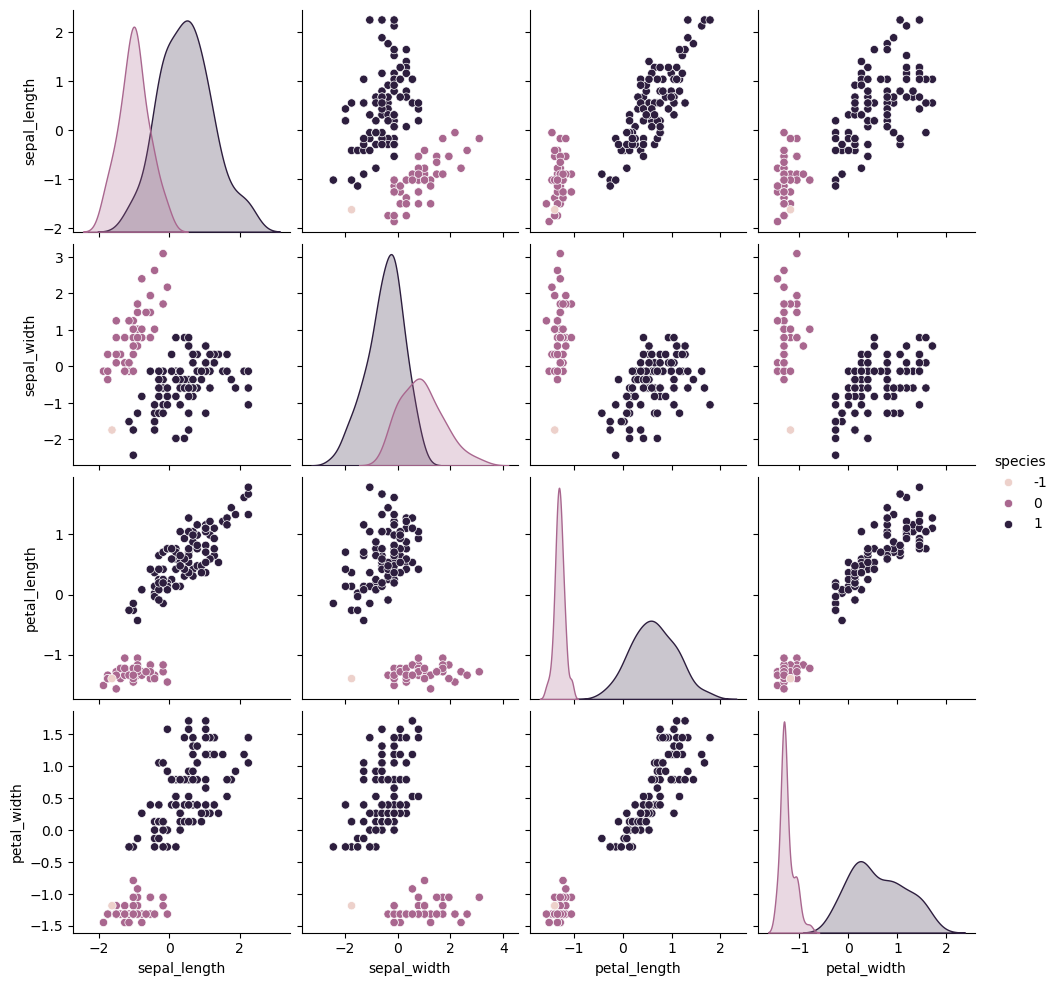

In [106]:
sb.pairplot(data=newDf, hue="species")

In [107]:
Silh_score = silhouette_score(newDf.drop("species",axis=1), newDf["species"]) 
print("silhoutte score:",Silh_score)

silhoutte score: 0.5186494967956768


In [108]:
pca = PCA(2) 
Xdf = newDf.drop("species",axis=1)
projDf = pd.DataFrame(pca.fit_transform(Xdf),columns=["x","y"]) 
projDf["label"]=newDf["species"]
print(projDf)

            x         y  label
0   -2.238785  0.395915      0
1   -2.372790  0.558811      0
2   -2.147098  1.071666      0
3   -2.103963  1.417071      0
4   -2.659310  1.690719      0
..        ...       ...    ...
141  1.387172  0.438064      1
142  1.878700  0.682145      1
143  0.895436  0.583998      1
144  0.908106  0.326863      1
145  1.067668  0.608343      1

[146 rows x 3 columns]


<Axes: xlabel='x', ylabel='y'>

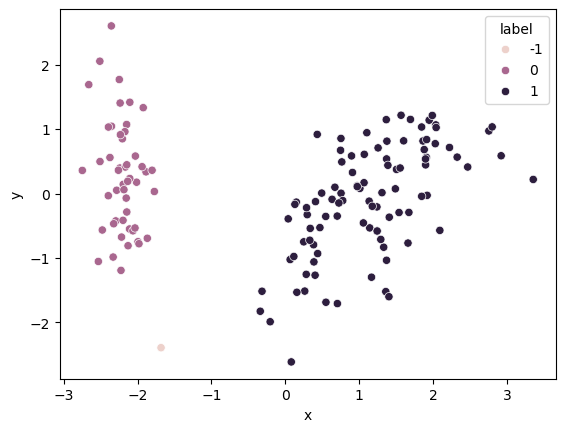

In [109]:
sb.scatterplot(data=projDf, x="x", y="y", hue="label")

In [115]:
Y_pred = np.zeros(len(df)) 
for k in clusters.keys(): 
    for c in clusters[k]: 
        Y_pred[c]=k 
le = LabelEncoder()
Y_true = le.fit_transform(df["species"].values)
print(len(Y_pred),len(Y_true))
print(Y_pred)

150 150
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0.]


<Axes: >

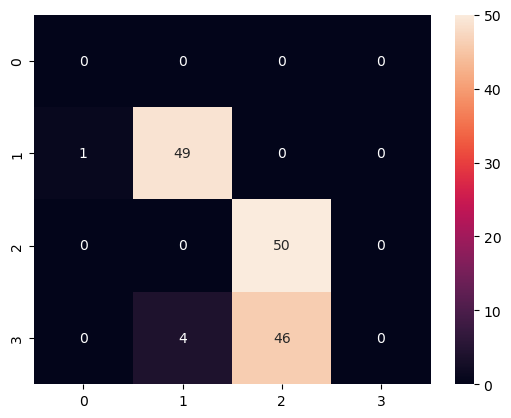

In [116]:
cm = confusion_matrix(Y_true,Y_pred) 
sb.heatmap(cm, annot=True) 